# スコア関数

In [1]:
from shiori.utils.viewer import set_plot_params, sns, plt
from shiori.utils.path import ProjectPath
from pathlib import Path
import numpy as np
from matplotlib import animation
from math import gamma
from scipy.stats import chi2
set_plot_params()
name = Path().cwd().name + "/score"
proj = ProjectPath(save_dst=name)
save_dir = proj.save_dir
save_dir.mkdir(parents=True, exist_ok=True)
plt.rcParams.update({
    "text.usetex": True,               # LaTeXを使う
    "font.family": "Arial",            # セリフ体
    "font.serif": ["Computer Modern"], # LaTeX標準フォント
})


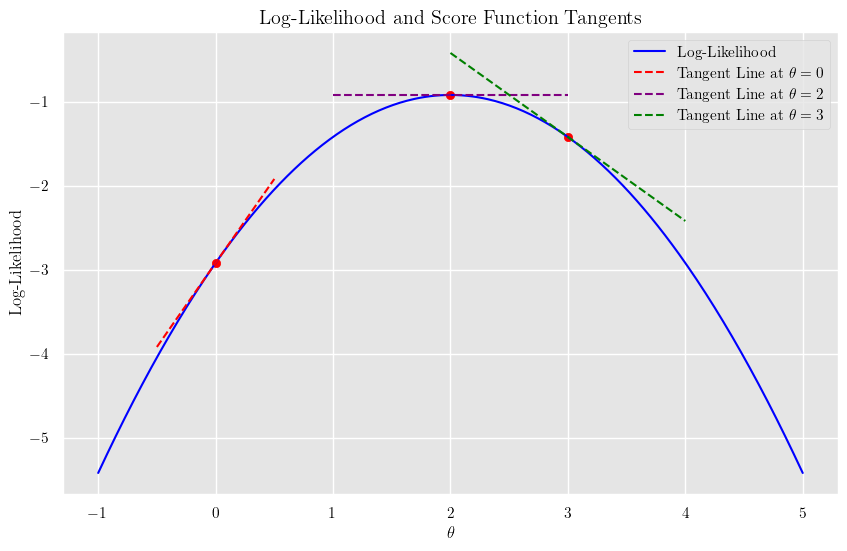

In [42]:
# 観測値と分布のパラメータ設定
x = 2.0       # 観測値
sigma = 1.0   # 分散は既知とする（sigma^2）

# θ の範囲
theta = np.linspace(-1, 5, 400)

# 対数尤度（正規 N(θ, σ^2) のとき）
loglik = -0.5 * np.log(2 * np.pi * sigma**2) - (x - theta)**2 / (2 * sigma**2)

# スコア関数 S(θ, x) = ∂/∂θ log f(x | θ) = (x - θ) / σ^2
score = (x - theta) / (sigma**2)

# プロット
plt.figure(figsize=(10, 6))
plt.plot(theta, loglik, label='Log-Likelihood', color='blue')

# \theta = 0 の接線(スコア関数)をplot
theta_range = np.linspace(-0.5, 0.5, 400)
theta0 = 0.0
loglik0 = -0.5 * np.log(2 * np.pi * sigma**2) - (x - theta0)**2 / (2 * sigma**2)
score0 = (x - theta0) / (sigma**2)
tangent_line = loglik0 + score0 * (theta_range - theta0)
plt.plot(theta_range, tangent_line, label=r'Tangent Line at $\theta=0$', color='red', linestyle='--')  
plt.scatter([theta0], [loglik0], color='red')  # 接点


# \theta = 2 の接線(スコア関数)をplot
theta_range = np.linspace(1, 3, 400)
theta2 = 2.0
loglik2 = -0.5 * np.log(2 * np.pi * sigma**2) - (x - theta2)**2 / (2 * sigma**2)
score2 = (x - theta2) / (sigma**2)
tangent_line2 = loglik2 + score2 * (theta_range - theta2)
plt.plot(theta_range, tangent_line2, label=r'Tangent Line at $\theta=2$', color='purple', linestyle='--')  
plt.scatter([theta2], [loglik2], color='red')  # 接点

# \theta = 3 の接線(スコア関数)をplot
theta_range = np.linspace(2, 4, 400)
theta1 = 3.0
loglik1 = -0.5 * np.log(2 * np.pi * sigma** 2) - (x - theta1)**2 / (2 * sigma**2)
score1 = (x - theta1) / (sigma**2)
tangent_line1 = loglik1 + score1 * (theta_range - theta1)
plt.plot(theta_range, tangent_line1, label=r'Tangent Line at $\theta=3$', color='green', linestyle='--')  
plt.scatter([theta1], [loglik1], color='red')  # 接点
plt.xlabel(r'$\theta$')
plt.ylabel('Log-Likelihood')
plt.legend()
plt.title('Log-Likelihood and Score Function Tangents')
plt.savefig(save_dir / "score.png", dpi=300)